In [4]:
import numpy as np   #linear algebra operations
import pandas as pd  #data preparation
import plotly.express as px #data visualization
from textblob import TextBlob #sentiment analysis

df=pd.read_csv("netflix_titles.csv")

In [5]:
df.shape

(8807, 12)

In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

<h3>What is the distribution of content ratings?</h3>

In [14]:
x=df.groupby(['rating']).size().reset_index(name='counts')
print(x)

      rating  counts
0     66 min       1
1     74 min       1
2     84 min       1
3          G      41
4      NC-17       3
5         NR      80
6         PG     287
7      PG-13     490
8          R     799
9      TV-14    2160
10      TV-G     220
11     TV-MA    3207
12     TV-PG     863
13      TV-Y     307
14     TV-Y7     334
15  TV-Y7-FV       6
16        UR       3


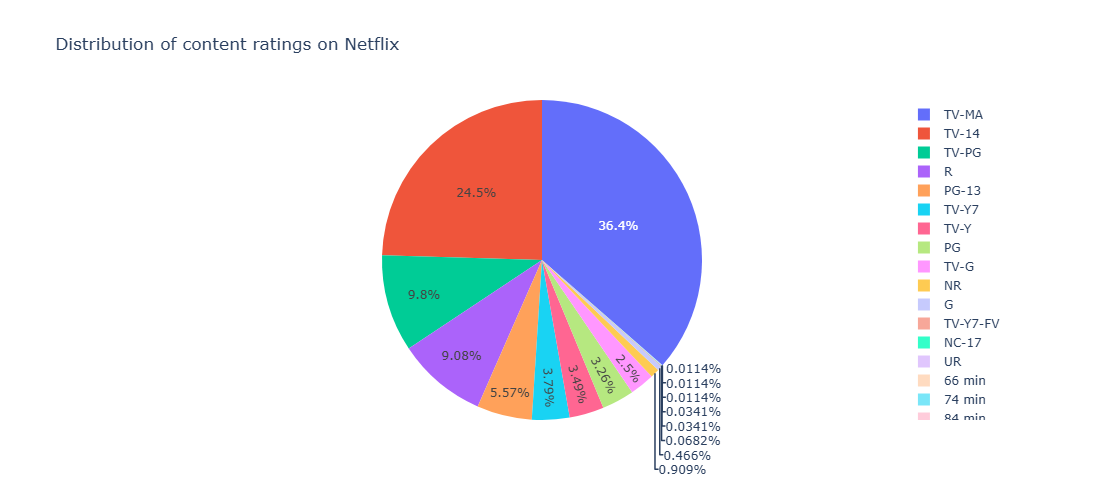

In [16]:
contentTypes=px.pie(x, values='counts',names='rating', title='Distribution of content ratings on Netflix')
contentTypes.update_layout(
    autosize=False,
    width=500,
    height=500
)
contentTypes.show()

<h3>Which directors have appeared the most on Netflix? </h3>
[OR]
<h3>Who are the most featured directors on Netflix?</h3>

<h4>Filling the NA values</h4>

In [18]:
df['director']=df['director'].fillna('Director not specified')

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director not specified,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<h4>Initializing a dataframe to store director data and expanding the director entry</h4>

In [27]:
directors_list=pd.DataFrame()   #empty dataframe

directors_list=df['director'].str.split(', ', expand=True).stack()
print(directors_list)

0     0           Kirsten Johnson
1     0    Director not specified
2     0           Julien Leclercq
3     0    Director not specified
4     0    Director not specified
                    ...          
8802  0             David Fincher
8803  0    Director not specified
8804  0           Ruben Fleischer
8805  0              Peter Hewitt
8806  0               Mozez Singh
Length: 9612, dtype: object


In [28]:
directors_list=directors_list.to_frame()
print(directors_list)

                             0
0    0         Kirsten Johnson
1    0  Director not specified
2    0         Julien Leclercq
3    0  Director not specified
4    0  Director not specified
...                        ...
8802 0           David Fincher
8803 0  Director not specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


In [29]:
#previously directors_list was a stacked Series or a MultiIndex Series (Length, dtype)
#Now, directors_list is a dataframe with rows and columns

<h4>Naming the column with director names as 'Director'</h4>

In [32]:
directors_list.columns=['Director']

print(directors_list)

                      Director
0    0         Kirsten Johnson
1    0  Director not specified
2    0         Julien Leclercq
3    0  Director not specified
4    0  Director not specified
...                        ...
8802 0           David Fincher
8803 0  Director not specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


<h4>Getting the total count of movies by each director</h4>

In [56]:
directors=directors_list.groupby(['Director']).size().reset_index(name='Total Count of Content')

print(directors)

                 Director  Total Count of Content
0             A. L. Vijay                       2
1            A. Raajdheep                       1
2               A. Salaam                       1
3         A.R. Murugadoss                       2
4         Aadish Keluskar                       1
...                   ...                     ...
4989           Éric Warin                       1
4990     Ísold Uggadóttir                       1
4991  Óskar Thór Axelsson                       1
4992     Ömer Faruk Sorak                       3
4993         Şenol Sönmez                       2

[4994 rows x 2 columns]


<h4>Removing the "Director not specified" value and sorting the DataFrame into ascending order</h4>

In [57]:
directors=directors[directors.Director!= 'Director not specified']

print(directors)

                 Director  Total Count of Content
0             A. L. Vijay                       2
1            A. Raajdheep                       1
2               A. Salaam                       1
3         A.R. Murugadoss                       2
4         Aadish Keluskar                       1
...                   ...                     ...
4989           Éric Warin                       1
4990     Ísold Uggadóttir                       1
4991  Óskar Thór Axelsson                       1
4992     Ömer Faruk Sorak                       3
4993         Şenol Sönmez                       2

[4993 rows x 2 columns]


In [37]:
#One row with 'Director not specified' is now excluded
#[4994 rows x 2 columns] ------> [4993 rows x 2 columns]

In [58]:
directors= directors.sort_values(by=['Total Count of Content'], ascending= False)

print(directors)

                 Director  Total Count of Content
3750        Rajiv Chilaka                      22
1907            Jan Suter                      21
3801          Raúl Campos                      19
4458          Suhas Kadav                      16
2867         Marcus Raboy                      16
...                   ...                     ...
4989           Éric Warin                       1
4990     Ísold Uggadóttir                       1
4991  Óskar Thór Axelsson                       1
682             Brody Chu                       1
4969              Zhao Ji                       1

[4993 rows x 2 columns]


In [59]:
top5_directors=directors.head()

print(top5_directors)

           Director  Total Count of Content
3750  Rajiv Chilaka                      22
1907      Jan Suter                      21
3801    Raúl Campos                      19
4458    Suhas Kadav                      16
2867   Marcus Raboy                      16


<h4>Plotting a bar chart to represent the top 5 movie directors featured on Netflix</h4>

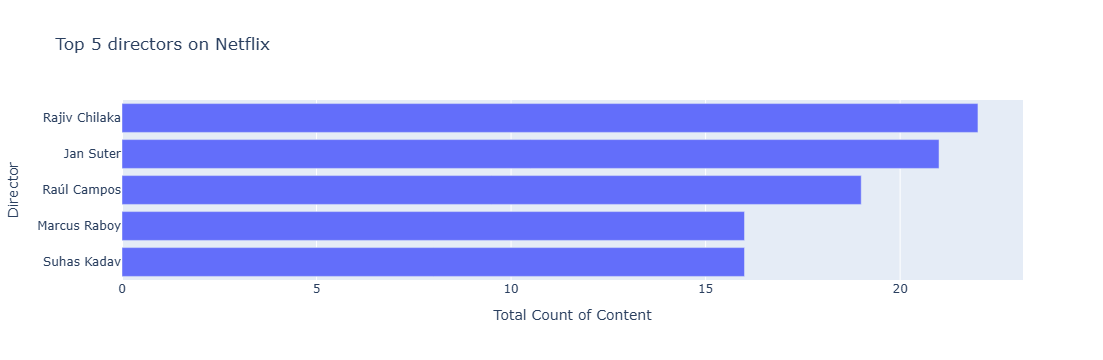

In [60]:
top5_directors= top5_directors.sort_values(by='Total Count of Content')
topdirectors_chart=px.bar(top5_directors, x='Total Count of Content', y='Director', title='Top 5 directors on Netflix')

topdirectors_chart.show()

<h3>Which actors have appeared the most on Netflix? </h3>
[OR]
<h3>Who are the most featured actors on Netflix?</h3>


<h4>Removing the entries with 'No cast specified'</h4>

In [53]:
df['cast']=df['cast'].fillna('No cast specified') 

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast specified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director not specified,No cast specified,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<h4>Initializing dataframe to store Cast/Actors data and finding the Total Count of Content corresponding to each actor</h4>

In [61]:
cast_df=pd.DataFrame()
cast_df=df['cast'].str.split(", ", expand=True).stack()
cast_df=cast_df.to_frame()
cast_df.columns=["Actor"]

print(cast_df)

                        Actor
0    0      No cast specified
1    0             Ama Qamata
     1            Khosi Ngema
     2          Gail Mabalane
     3         Thabang Molaba
...                       ...
8806 3       Manish Chaudhary
     4           Meghna Malik
     5          Malkeet Rauni
     6         Anita Shabdish
     7  Chittaranjan Tripathy

[64951 rows x 1 columns]


In [62]:
actors=cast_df.groupby(["Actor"]).size().reset_index(name="Total Count of Content")

print(actors)

                       Actor  Total Count of Content
0                        Jr.                       2
1      "Riley" Lakdhar Dridi                       1
2               'Najite Dede                       2
3                   2 Chainz                       1
4                       2Mex                       1
...                      ...                     ...
36435           Şevket Çoruh                       1
36436       Şinasi Yurtsever                       3
36437           Şükran Ovalı                       1
36438         Şükrü Özyıldız                       2
36439           Ṣọpẹ́ Dìrísù                       1

[36440 rows x 2 columns]


In [63]:
actors=actors[actors.Actor!="No cast specified"]
actors=actors.sort_values(by=["Total Count of Content"], ascending=False)

print(actors)

                   Actor  Total Count of Content
2833         Anupam Kher                      43
30490     Shah Rukh Khan                      35
16697      Julie Tejwani                      33
24215   Naseeruddin Shah                      32
32592   Takahiro Sakurai                      32
...                  ...                     ...
36435       Şevket Çoruh                       1
14232  Jamie Renée Smith                       1
36437       Şükran Ovalı                       1
18122  Khushboo Upadhyay                       1
31885        Steve Hicks                       1

[36439 rows x 2 columns]


<h4>Finding the top 5 most frequently featured actors and plotting a barchart to represent the same</h4>

In [65]:
top5_actors=actors.head()
top5_actors=top5_actors.sort_values(by=['Total Count of Content'])  #for plotting chart

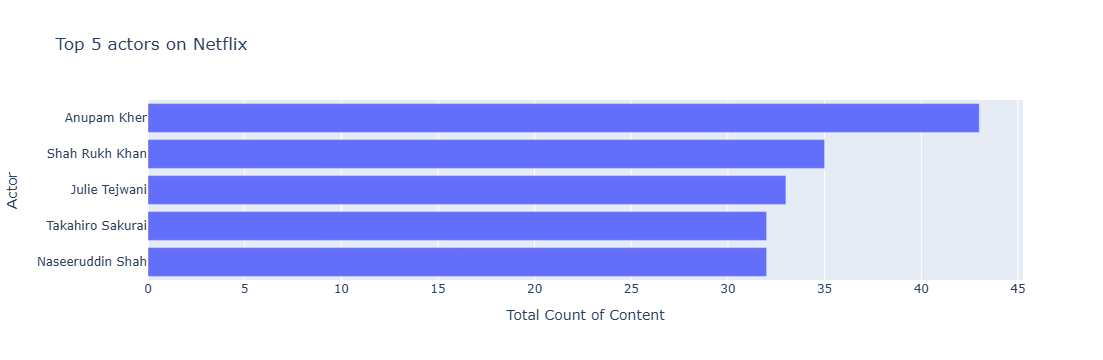

In [66]:
topactors=px.bar(top5_actors, x="Total Count of Content", y="Actor",title="Top 5 actors on Netflix")
topactors.show()

<h3>Analyzing the type of content (Movies vs TV Shows) available on Netflix by year of release</h3>

In [68]:
df1=df[['type','release_year']]
df1.head()

,type,release_year
0,Movie,2020
1,TV Show,2021
2,TV Show,2021
3,TV Show,2021
4,TV Show,2021


In [70]:
df2=df1.groupby(['release_year','type']).size().reset_index(name="Total Count")
print(df2)

     release_year     type  Total Count
0            1925  TV Show            1
1            1942    Movie            2
2            1943    Movie            3
3            1944    Movie            3
4            1945    Movie            3
..            ...      ...          ...
114          2019  TV Show          397
115          2020    Movie          517
116          2020  TV Show          436
117          2021    Movie          277
118          2021  TV Show          315

[119 rows x 3 columns]


In [72]:
df2= df2.rename(columns={"release_year":"Release Year","type":"Type"})

print(df2)

     Release Year     Type  Total Count
0            1925  TV Show            1
1            1942    Movie            2
2            1943    Movie            3
3            1944    Movie            3
4            1945    Movie            3
..            ...      ...          ...
114          2019  TV Show          397
115          2020    Movie          517
116          2020  TV Show          436
117          2021    Movie          277
118          2021  TV Show          315

[119 rows x 3 columns]


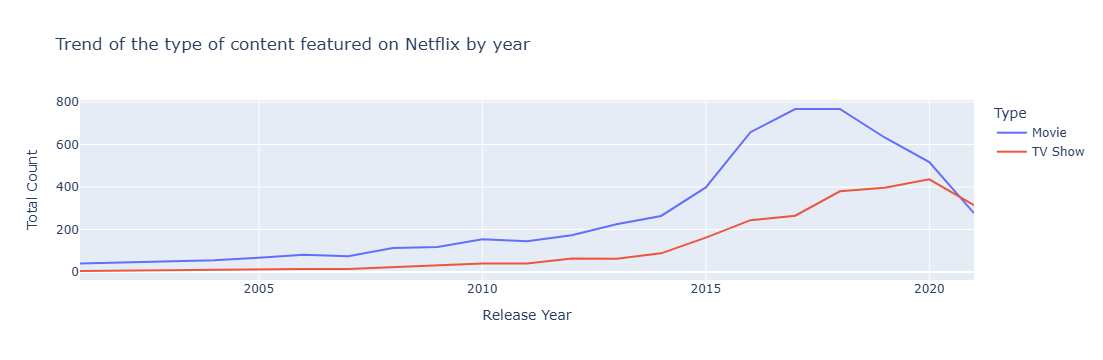

In [77]:
df2=df2[df2["Release Year"]>=2000]  #taking data from release year 2000 and up
typeContent=px.line(df2, x="Release Year", y="Total Count", color="Type", title="Trend of the type of content featured on Netflix by year")

typeContent.show()

In [78]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast specified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director not specified,No cast specified,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [79]:
df["country"]=df["country"].fillna("Country not specified")

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast specified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country not specified,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director not specified,No cast specified,Country not specified,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [90]:
country_df=pd.DataFrame()
country_df=df["country"].str.split(", ", expand=True).stack()
country_df=country_df.to_frame()
country_df.columns=["Country"]
print(country_df)

                      Country
0    0          United States
1    0           South Africa
2    0  Country not specified
3    0  Country not specified
4    0                  India
...                       ...
8802 0          United States
8803 0  Country not specified
8804 0          United States
8805 0          United States
8806 0                  India

[10845 rows x 1 columns]


In [91]:
countries=country_df.groupby(['Country']).size().reset_index(name="Total Count")
print(countries)

          Country  Total Count
0                            2
1     Afghanistan            1
2         Albania            1
3         Algeria            3
4          Angola            1
..            ...          ...
123  Vatican City            1
124     Venezuela            4
125       Vietnam            7
126  West Germany            5
127      Zimbabwe            3

[128 rows x 2 columns]


In [98]:
countries=countries.sort_values(by="Total Count", ascending=False)
top5_countries=countries.head()
print(top5_countries)

                   Country  Total Count
120          United States         3689
48                   India         1046
27   Country not specified          831
118         United Kingdom          804
22                  Canada          445


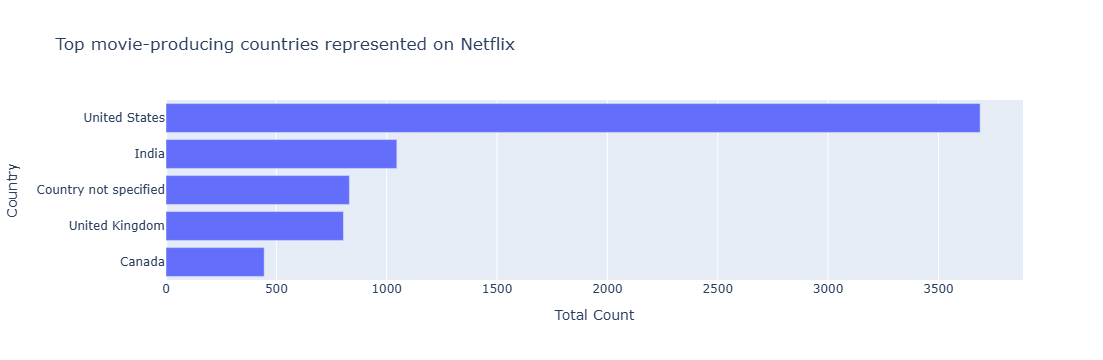

In [101]:
top5_countries=top5_countries.sort_values(by="Total Count")
topcountries_Chart=px.bar(top5_countries, x="Total Count", y="Country", title="Top movie-producing countries represented on Netflix")

topcountries_Chart.show()

<h4>Sentiment Analysis</h4>

In [111]:
df3=df[['release_year','description']]
df3=df3.rename(columns={'release_year':"Release Year", 'description':"Description"})

print(df3)

      Release Year                                        Description
0             2020  As her father nears the end of his life, filmm...
1             2021  After crossing paths at a party, a Cape Town t...
2             2021  To protect his family from a powerful drug lor...
3             2021  Feuds, flirtations and toilet talk go down amo...
4             2021  In a city of coaching centers known to train I...
...            ...                                                ...
8802          2007  A political cartoonist, a crime reporter and a...
8803          2018  While living alone in a spooky town, a young g...
8804          2009  Looking to survive in a world taken over by zo...
8805          2006  Dragged from civilian life, a former superhero...
8806          2015  A scrappy but poor boy worms his way into a ty...

[8807 rows x 2 columns]


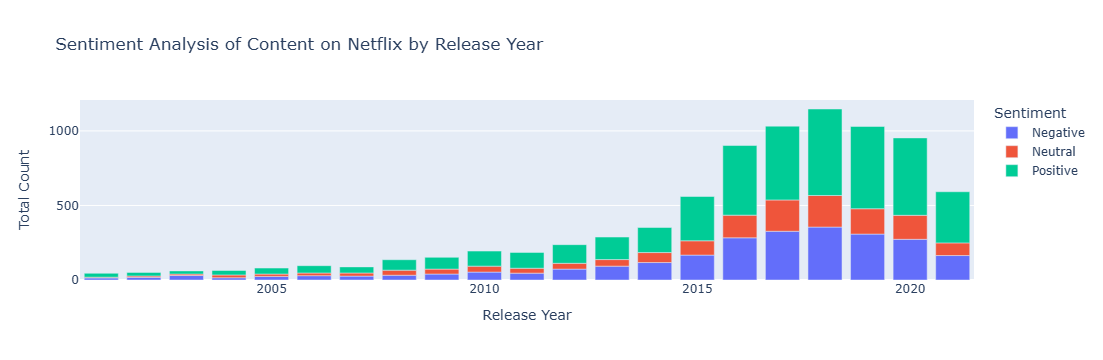

In [112]:
for index, row in df3.iterrows():
    d=row["Description"]
    testimonial=TextBlob(d)
    p=testimonial.sentiment.polarity  #stores polarity

    if p==0:
        senti= 'Neutral'
    elif p>0:
        senti= "Positive"
    else:
        senti= "Negative"
    df3.loc[[index, 2], 'Sentiment']=senti  #storing sentiment (senti) at index==2 w/ heading 'Sentiment'

#Taking count of content based on Release Year and Sentiment
df3 = df3.groupby(["Release Year", "Sentiment"]).size().reset_index(name='Total Count')
df3=df3[df3["Release Year"]>2000]

sentiment_Chart=px.bar(df3, x="Release Year", y="Total Count", color="Sentiment", title="Sentiment Analysis of Content on Netflix by Release Year")
sentiment_Chart.show()